In [170]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_columns', None)  # or 1000

In [152]:
def agg_to_cbsa(df):
    cols = df.columns.tolist()[3:]
    for c in cols:
        df[c] = df[c] * df['COUNTY_POP']
    #df = pd.concat([df['GTCBSA']], df[[cols]], axis=1)
    df = df.groupby('GTCBSA').sum()
    for c in cols:
        df[c] = df[c] / df['COUNTY_POP']
    df = df[cols]
    return df

In [153]:
loc = '/Users/jericho/Documents/csi/csi-research/Data/fb_data_for_good/movement_range_maps/movement-range-data-2020-03-01-2020-12-31/'
data = pd.read_csv(loc+'movement-range-data-2020-03-01--2020-12-31.txt',sep='\t')
data = copy.deepcopy(data[data['country']=='USA'])

data['polygon_id'] = data['polygon_id'].astype(int)
data['ds'] = pd.to_datetime(data['ds'],infer_datetime_format=True)
data['all_day_bing_tiles_visited_relative_change'] = data['all_day_bing_tiles_visited_relative_change'].astype(float)
data['all_day_ratio_single_tile_users'] = data['all_day_ratio_single_tile_users'].astype(float)

data = data[data['polygon_id']< 70000]
tiles_visited = copy.deepcopy(data[['ds','polygon_id','all_day_bing_tiles_visited_relative_change']])
ratio_change = copy.deepcopy(data[['ds','polygon_id','all_day_ratio_single_tile_users']])
del data


cbsa_pop = pd.read_csv('/Users/jericho/Documents/csi/family-geog/data/clean/cbsa/cbsa_summary_BLS.csv')
cbsa_pop = cbsa_pop[['GTCBSA','LOG_POP']]

cbsa = pd.read_csv('~/Documents/csi/csi-research/Data/county-cbsa-crosswalk-cleaned.csv')
cbsa_crosswalk = copy.deepcopy(cbsa[['County Code','CBSA Code']])
cbsa_crosswalk.columns = ['FIPS','GTCBSA']

county = pd.read_csv('/Users/jericho/Documents/csi/csi-research/Data/census/ACS5Y2019_B01001_county.csv')
county = county[['GEO_ID','B01001_001E']]
county = county.drop(0,axis=0)
county['GEO_ID'] = county['GEO_ID'].apply(lambda x: x[-5:])
county['GEO_ID'] = county['GEO_ID'].astype(int)
county['B01001_001E'] = county['B01001_001E'].astype(float)
county.columns = ['FIPS','COUNTY_POP']

/var/folders/qv/9w3wskgd1pj1k5ffzq67k54c0000gn/T/ipykernel_889/3595376704.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(loc+'movement-range-data-2020-03-01--2020-12-31.txt',sep='\t')


In [154]:
tiles_pivot = tiles_visited.pivot_table(index='polygon_id', columns='ds', values='all_day_bing_tiles_visited_relative_change')
tiles_pivot = tiles_pivot.reset_index()
tiles_pivot = tiles_pivot.rename(columns={'polygon_id':'FIPS'})
tiles_pivot = county.merge(tiles_pivot,how='right',on='FIPS')
tiles_pivot = cbsa_crosswalk.merge(tiles_pivot,how='right',on='FIPS')
tiles_pivot = tiles_pivot[~tiles_pivot['GTCBSA'].isna()]

ratio_pivot = ratio_change.pivot_table(index='polygon_id', columns='ds', values='all_day_ratio_single_tile_users')
ratio_pivot = ratio_pivot.reset_index()
ratio_pivot = ratio_pivot.rename(columns={'polygon_id':'FIPS'})
ratio_pivot = county.merge(ratio_pivot,how='right',on='FIPS')
ratio_pivot = cbsa_crosswalk.merge(ratio_pivot,how='right',on='FIPS')
ratio_pivot = ratio_pivot[~ratio_pivot['GTCBSA'].isna()]

ratio_pivot = agg_to_cbsa(ratio_pivot)
tiles_pivot = agg_to_cbsa(tiles_pivot)

In [155]:
ratio_pivot

2020-03-01 00:00:00  2020-03-02 00:00:00  2020-03-03 00:00:00  \
GTCBSA                                                                   
10100.0             0.189030             0.120710             0.132210   
10140.0             0.214490             0.177740             0.165110   
10180.0             0.170056             0.124053             0.115549   
10220.0             0.176520             0.134220             0.118200   
10300.0             0.201700             0.131670             0.112310   
...                      ...                  ...                  ...   
49660.0             0.201520             0.152847             0.142736   
49700.0             0.207650             0.147556             0.134409   
49740.0             0.181660             0.142520             0.129930   
49780.0             0.218660             0.165250             0.146640   
49820.0             0.135550             0.110610             0.111760   

         2020-03-04 00:00:00  2020-03-05 00:00:00  2020-03-06 00:00:00  \
GTCBSA                                                                   
10100.0             0.126290             0.126560             0.107890   
10140.0             0.152330             0.175630             0.172000   
10180.0             0.149042             0.117287             0.113883   
10220.0             0.120920             0.107620             0.116390   
10300.0             0.112440             0.114310             0.126380   
...                      ...                  ...                  ...   
49660.0             0.138146             0.138006             0.144004   
49700.0             0.136469             0.143483             0.145594   
49740.0             0.132720             0.124200             0.122660   
49780.0             0.149500             0.149660             0.159940   
49820.0             0.108110             0.079760             0.100880   

         2020-03-07 00:00:00  2020-03-08 00:00:00  2020-03-09 00:00:00  \
GTCBSA                                                                   
10100.0             0.143800             0.188070             0.122950   
10140.0             0.212000             0.232770             0.160000   
10180.0             0.147000             0.200429             0.142274   
10220.0             0.156000             0.212040             0.138390   
10300.0             0.146200             0.190490             0.126920   
...                      ...                  ...                  ...   
49660.0             0.181306             0.195492             0.141326   
49700.0             0.202061             0.225100             0.149711   
49740.0             0.144000             0.175190             0.129520   
49780.0             0.196040             0.210210             0.148770   
49820.0             0.144070             0.136850             0.113200   

         2020-03-10 00:00:00  2020-03-11 00:00:00  2020-03-12 00:00:00  \
GTCBSA                                                                   
10100.0             0.122860             0.121960             0.131920   
10140.0             0.167380             0.164200             0.171900   
10180.0             0.128203             0.128990             0.131621   
10220.0             0.137290             0.123840             0.113570   
10300.0             0.118680             0.120610             0.122460   
...                      ...                  ...                  ...   
49660.0             0.157875             0.150567             0.142790   
49700.0             0.146872             0.141454             0.139046   
49740.0             0.142830             0.138110             0.149860   
49780.0             0.160560             0.153670             0.154780   
49820.0             0.113630             0.105950             0.121030   

         2020-03-13 00:00:00  2020-03-14 00:00:00  2020-03-15 00:00:00  \
GTCBSA                                                                   
10100.0  

In [156]:
tiles_pivot

2020-03-01 00:00:00  2020-03-02 00:00:00  2020-03-03 00:00:00  \
GTCBSA                                                                   
10100.0             0.038290            -0.058230             0.028420   
10140.0             0.036570            -0.029560             0.040430   
10180.0             0.124271             0.039267             0.064808   
10220.0             0.166520             0.096390             0.053670   
10300.0             0.025840            -0.002900             0.044950   
...                      ...                  ...                  ...   
49660.0             0.108653             0.030864             0.050219   
49700.0             0.024951             0.000410             0.066473   
49740.0             0.051490             0.033570             0.090390   
49780.0             0.065750             0.034980             0.089830   
49820.0             0.115460            -0.045320             0.026040   

         2020-03-04 00:00:00  2020-03-05 00:00:00  2020-03-06 00:00:00  \
GTCBSA                                                                   
10100.0             0.010540            -0.067770             0.048460   
10140.0             0.023450            -0.024250            -0.020650   
10180.0            -0.037355             0.038499             0.058115   
10220.0             0.064660             0.039730            -0.005000   
10300.0             0.046890             0.094160             0.008290   
...                      ...                  ...                  ...   
49660.0             0.047652             0.094159             0.046065   
49700.0             0.029087             0.065735            -0.017141   
49740.0             0.017520             0.026460             0.036220   
49780.0             0.066010             0.073750             0.049930   
49820.0             0.136340             0.135950            -0.044860   

         2020-03-07 00:00:00  2020-03-08 00:00:00  2020-03-09 00:00:00  \
GTCBSA                                                                   
10100.0             0.055390            -0.021730            -0.048820   
10140.0            -0.009910             0.018720             0.046130   
10180.0             0.048279             0.006906             0.017161   
10220.0             0.110420            -0.003560             0.079060   
10300.0             0.097030             0.039130             0.025940   
...                      ...                  ...                  ...   
49660.0             0.064872             0.136984             0.071886   
49700.0            -0.065776            -0.044766             0.019873   
49740.0             0.076280             0.071530             0.082220   
49780.0             0.013600             0.066150             0.092760   
49820.0             0.100820             0.102460            -0.002830   

         2020-03-10 00:00:00  2020-03-11 00:00:00  2020-03-12 00:00:00  \
GTCBSA                                                                   
10100.0             0.014520            -0.008010             0.008580   
10140.0             0.021640            -0.037080            -0.028830   
10180.0             0.035379             0.082117             0.074275   
10220.0             0.008650             0.075130             0.080790   
10300.0             0.010480             0.002230             0.057810   
...                      ...                  ...                  ...   
49660.0             0.031191             0.015506             0.068901   
49700.0             0.017583             0.017321            -0.003720   
49740.0             0.049380            -0.044710            -0.055160   
49780.0             0.030490             0.036690             0.064120   
49820.0             0.025080             0.076630            -0.047880   

         2020-03-13 00:00:00  2020-03-14 00:00:00  2020-03-15 00:00:00  \
GTCBSA                                                                   
10100.0  

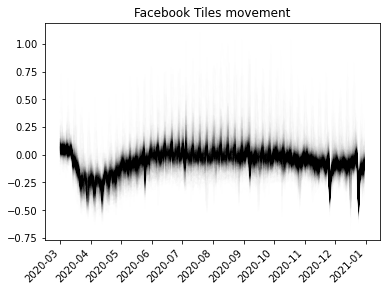

In [157]:
plt.plot(tiles_pivot.T,c='black',alpha=0.005)
plt.xticks(rotation = 45, ha='right')
plt.title("Facebook Tiles movement")
plt.show()

In [158]:
goog = pd.read_csv('/Users/jericho/Documents/csi/csi-research/Data/Global_Mobility_Report.csv')
goog = goog[~goog['census_fips_code'].isna()]
goog = goog[['census_fips_code','date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']]

goog.columns = ['FIPS','date',
       'retail_and_recreation',
       'grocery_and_pharmacy',
       'parks',
       'transit_stations',
       'workplaces',
       'residential']

goog['date'] = pd.to_datetime(goog['date'],infer_datetime_format=True)

goog = cbsa_crosswalk.merge(goog, on='FIPS',how='left')
goog = county.merge(goog, on='FIPS',how='left')

/var/folders/qv/9w3wskgd1pj1k5ffzq67k54c0000gn/T/ipykernel_889/1772710042.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  goog = pd.read_csv('/Users/jericho/Documents/csi/csi-research/Data/Global_Mobility_Report.csv')


In [159]:
pop_cbsa = goog[['GTCBSA','COUNTY_POP','FIPS']].drop_duplicates()

In [160]:
goog.head()
cols = goog.columns.tolist()

df_names = []
df_data  = []

for c in cols[-5:]:
    tdf = goog[['FIPS','date', c]]
    tdf = tdf.pivot_table(index='FIPS', columns='date', values=c)
    tdf = pop_cbsa.merge(tdf,on='FIPS',how='right')
    #display(tdf)
    tdf = agg_to_cbsa(tdf)
    df_names.append(c)
    df_data.append(tdf)

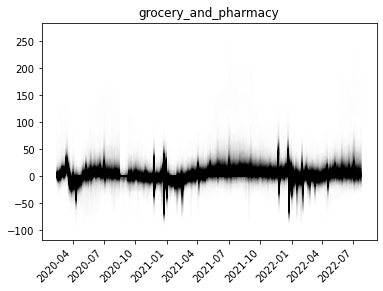

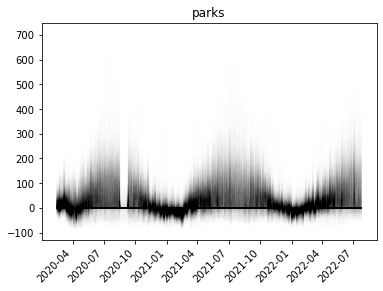

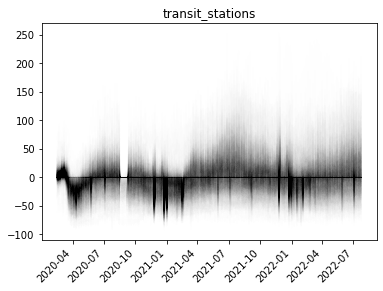

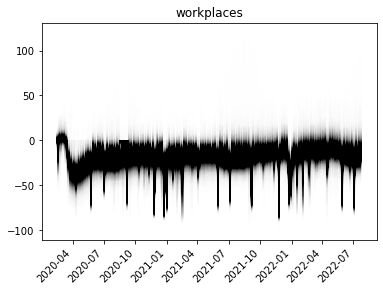

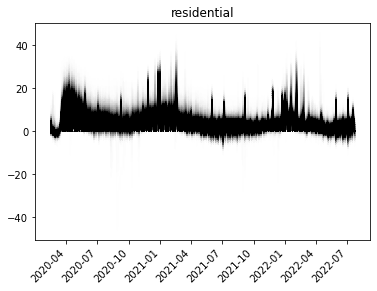

In [162]:
for i in range(len(df_names)):
    plt.plot(df_data[i].T,c='black',alpha=0.002)
    plt.xticks(rotation = 45, ha='right')
    plt.title(df_names[i])
    plt.show()

In [167]:
df_data_trimmed = [copy.deepcopy(i) for i in df_data]

for i in range(len(df_data_trimmed)):
    df_data_trimmed[i] = df_data_trimmed[i][tiles_pivot.columns.tolist()]

In [171]:
tiles_pivot.head()

2020-03-01 00:00:00  2020-03-02 00:00:00  2020-03-03 00:00:00  \
GTCBSA                                                                   
10100.0             0.038290            -0.058230             0.028420   
10140.0             0.036570            -0.029560             0.040430   
10180.0             0.124271             0.039267             0.064808   
10220.0             0.166520             0.096390             0.053670   
10300.0             0.025840            -0.002900             0.044950   

         2020-03-04 00:00:00  2020-03-05 00:00:00  2020-03-06 00:00:00  \
GTCBSA                                                                   
10100.0             0.010540            -0.067770             0.048460   
10140.0             0.023450            -0.024250            -0.020650   
10180.0            -0.037355             0.038499             0.058115   
10220.0             0.064660             0.039730            -0.005000   
10300.0             0.046890             0.094160             0.008290   

         2020-03-07 00:00:00  2020-03-08 00:00:00  2020-03-09 00:00:00  \
GTCBSA                                                                   
10100.0             0.055390            -0.021730            -0.048820   
10140.0            -0.009910             0.018720             0.046130   
10180.0             0.048279             0.006906             0.017161   
10220.0             0.110420            -0.003560             0.079060   
10300.0             0.097030             0.039130             0.025940   

         2020-03-10 00:00:00  2020-03-11 00:00:00  2020-03-12 00:00:00  \
GTCBSA                                                                   
10100.0             0.014520            -0.008010             0.008580   
10140.0             0.021640            -0.037080            -0.028830   
10180.0             0.035379             0.082117             0.074275   
10220.0             0.008650             0.075130             0.080790   
10300.0             0.010480             0.002230             0.057810   

         2020-03-13 00:00:00  2020-03-14 00:00:00  2020-03-15 00:00:00  \
GTCBSA                                                                   
10100.0            -0.026590            -0.093360            -0.117550   
10140.0            -0.066430            -0.115680            -0.012350   
10180.0            -0.027401            -0.026392            -0.033514   
10220.0            -0.066270            -0.124850            -0.047060   
10300.0            -0.035150            -0.109640            -0.106020   

         2020-03-16 00:00:00  2020-03-17 00:00:00  2020-03-18 00:00:00  \
GTCBSA                                                                   
10100.0             -0.16135            -0.110130            -0.125160   
10140.0             -0.07147            -0.102960            -0.166770   
10180.0             -0.08486            -0.058607            -0.059129   
10220.0             -0.05304            -0.141630            -0.141140   
10300.0             -0.10044            -0.145530            -0.205910   

         2020-03-19 00:00:00  2020-03-20 00:00:00  2020-03-21 00:00:00  \
GTCBSA                                                                   
10100.0            -0.182130            -0.248320            -0.238080   
10140.0            -0.154760            -0.163110            -0.162830   
10180.0            -0.094896            -0.145307            -0.224572   
10220.0            -0.200540            -0.188510            -0.220960   
10300.0            -0.167470            -0.236420            -0.335530   

         2020-03-22 00:00:00  2020-03-23 00:00:00  2020-03-24 00:00:00  \
GTCBSA                                                                   
10100.0            -0.207980             -0.18584             -0.08491   
10140.0            -0.286670             -0.25158             -0.27656   
10180.0            -0.240642             -0.15362             -0.13592   
10220.

In [172]:
df_data_trimmed[0].head()

2020-03-01 00:00:00  2020-03-02 00:00:00  2020-03-03 00:00:00  \
GTCBSA                                                                   
10100.0             5.000000             0.000000             3.000000   
10140.0            14.000000            12.000000            15.000000   
10180.0             7.275469             5.863437            10.756394   
10220.0            22.000000             0.000000            11.000000   
10300.0             9.000000             0.000000            12.000000   

         2020-03-04 00:00:00  2020-03-05 00:00:00  2020-03-06 00:00:00  \
GTCBSA                                                                   
10100.0             8.000000            -6.000000             3.000000   
10140.0            18.000000            13.000000            14.000000   
10180.0            -2.603877            13.061429             6.198038   
10220.0             9.000000             6.000000             1.000000   
10300.0             7.000000             7.000000            -6.000000   

         2020-03-07 00:00:00  2020-03-08 00:00:00  2020-03-09 00:00:00  \
GTCBSA                                                                   
10100.0            21.000000            12.000000            -3.000000   
10140.0            13.000000            15.000000            19.000000   
10180.0             8.655638             0.243559             6.233704   
10220.0            -2.000000             7.000000            -2.000000   
10300.0             8.000000            13.000000             1.000000   

         2020-03-10 00:00:00  2020-03-11 00:00:00  2020-03-12 00:00:00  \
GTCBSA                                                                   
10100.0            -3.000000            18.000000            15.000000   
10140.0            12.000000            18.000000            24.000000   
10180.0             4.665352             8.909005            23.487071   
10220.0            -2.000000            15.000000            25.000000   
10300.0             6.000000            11.000000            36.000000   

         2020-03-13 00:00:00  2020-03-14 00:00:00  2020-03-15 00:00:00  \
GTCBSA                                                                   
10100.0            35.000000            28.000000            11.000000   
10140.0            28.000000            21.000000            21.000000   
10180.0            14.948426            10.467455             4.497021   
10220.0             3.000000             1.000000             6.000000   
10300.0            28.000000            17.000000            17.000000   

         2020-03-16 00:00:00  2020-03-17 00:00:00  2020-03-18 00:00:00  \
GTCBSA                                                                   
10100.0             13.00000            13.000000             8.000000   
10140.0             31.00000            15.000000            20.000000   
10180.0             18.89305            13.851098            17.162467   
10220.0             15.00000             4.000000            17.000000   
10300.0             26.00000            17.000000             8.000000   

         2020-03-19 00:00:00  2020-03-20 00:00:00  2020-03-21 00:00:00  \
GTCBSA                                                                   
10100.0             2.000000              2.00000            -2.000000   
10140.0            15.000000             17.00000            10.000000   
10180.0            21.217749             12.67901             3.279272   
10220.0            -2.000000              0.00000             1.000000   
10300.0            20.000000              8.00000             2.000000   

         2020-03-22 00:00:00  2020-03-23 00:00:00  2020-03-24 00:00:00  \
GTCBSA                                                                   
10100.0             -4.00000            -9.000000                -10.0   
10140.0             -2.00000             0.000000                 -7.0   
10180.0             -5.41574             1.263317                  0.0   
10220.

In [173]:
def inner_array(a,b):
    return [i for i in a if i in b]

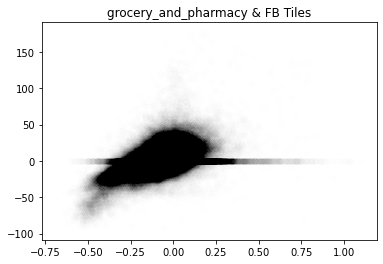

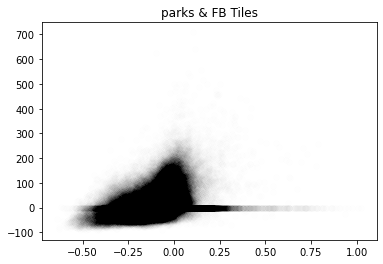

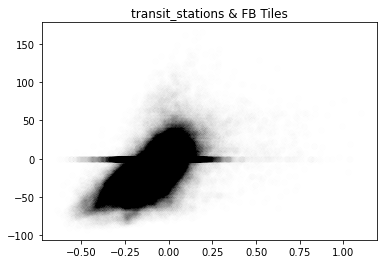

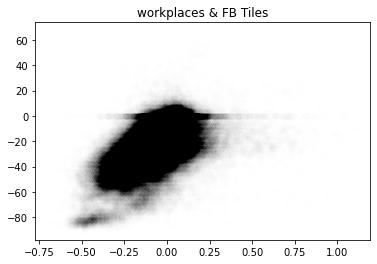

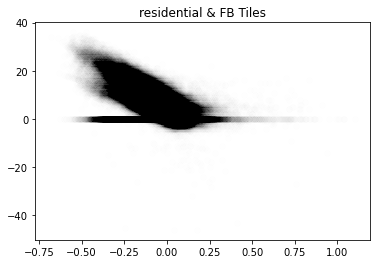

In [187]:
for i in range(len(df_data_trimmed)):
    name = df_names[i]
    df = df_data_trimmed[i]
    tiles_idx = tiles_pivot.index.tolist()
    df_idx = df.index.tolist()
    inner_idx = inner_array(tiles_idx, df_idx)
    df_subset = df.loc[inner_idx]
    tiles_subset = tiles_pivot.loc[inner_idx]
    plt.title(name+' & FB Tiles')
    plt.scatter(tiles_subset, df_subset, c='black',alpha=0.005)
    plt.show()

In [194]:
%pwd

'/Users/jericho/Documents/csi/csi-research/Notebooks'

In [196]:
for i in range(len(df_names)):
    print(df_names[i])
    df_data[i].to_csv('CBSA_data/CBSA_'+df_names[i]+'.csv')

grocery_and_pharmacy
parks
transit_stations
workplaces
residential


In [197]:
tiles_subset.to_csv('CBSA_data/CBSA_fb_tiles.csv')